# Import Libraries

In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import statsmodels.formula.api as smf
from pickle import dump
from pickle import load

# Import data

In [6]:
salary=pd.read_csv('Salary_data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# DATA understanding and DATA preparation

In [7]:
salary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
salary.tail(5)

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [9]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [13]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
salary.shape

(30, 2)

# Assumption check 
 #### 1.Normality

<function matplotlib.pyplot.show(close=None, block=None)>

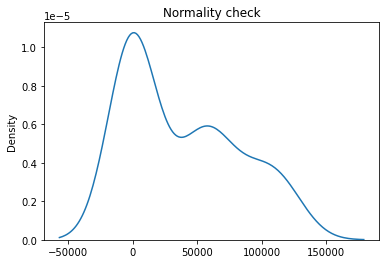

In [17]:
sns.distplot(a=salary,hist=False)
plt.title('Normality check')
plt.show

In [20]:
salary['YearsExperience'].skew()

0.37956024064804106

In [22]:
salary['YearsExperience'].kurtosis()

-1.0122119403325072

# Normality test is failed

#### 2.Lineraity

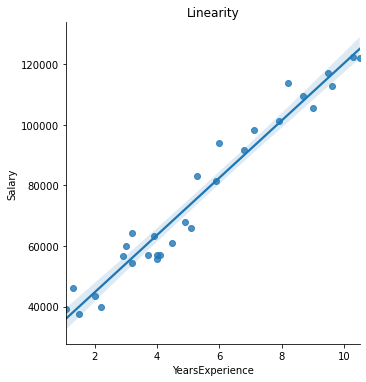

In [27]:
sns.lmplot(x='YearsExperience', y='Salary',data=salary)
plt.title('Linearity')
plt.show()

# Linearity test is failed

# 3. Multicollinearity Test
We cannot perform here as we are having onlu one input feature.

4. AutoRegression Test
We cannot perform here as we are having only one input feature and that is also not time based feature.

5. Homoscedasticity Test | 6. Zero Residual Mean Test
These 2 Tests can be ony performed post model Training.

#### NOTE:

Linear Regression can be performed by using 2 libraries:

**1. Statsmodels - OLS[Ordinary Least Square]**

**2. sklearn - LinearRegression()**

# 5. Model Building || 6. Model Training Using Statsmodels

In [32]:
model=smf.ols(formula='YearsExperience~Salary', data=salary,).fit()

In [34]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

# Model_testing

In [41]:
test=pd.DataFrame(data={'Salary':[39343.0,43525.0]})
test

,Salary
0,39343.0
1,43525.0


In [42]:
model.predict(test)

0    1.600934
1    2.024427
dtype: float64